This is capston project for my udacity ML nanodegree project

You can find the data information from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and more detailed from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt). The data contains 23 nominal, 23 ordinal, 14 discrete, 20 continuous variables and one target variable. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check the dimension
print(train.shape)

(1460, 81)


In [153]:
test = pd.read_csv('test.csv')
print(test.shape)

(1459, 80)


In [158]:
data = pd.concat([train.iloc[:,0:-1], test], axis=0)
data.shape

(2919, 80)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

### Summary of information:

- There are about half categorical (43) and heal numerical features (38)
- Some columns contain missing data 

In [166]:
# check the missing values in each feature
s = train.apply(lambda x: sum(x.isnull()), axis=0)
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# check the statistical summary of numerical data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- LotFrontage, MasVnrArea, GaragYrBlt have missing data
- Some features are skewed

In [7]:
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

# Visualize Continuous features (exclude the ID) 

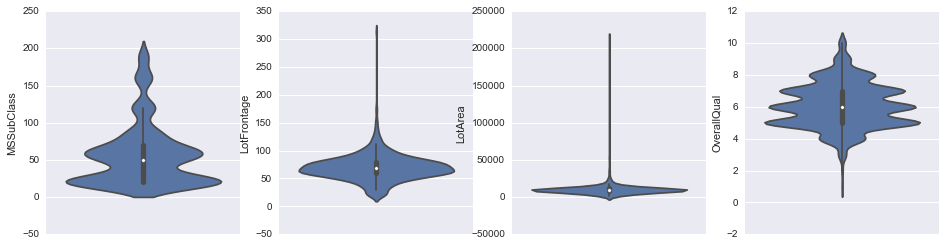

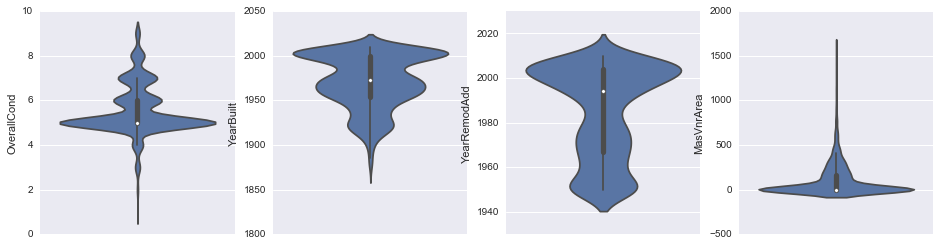

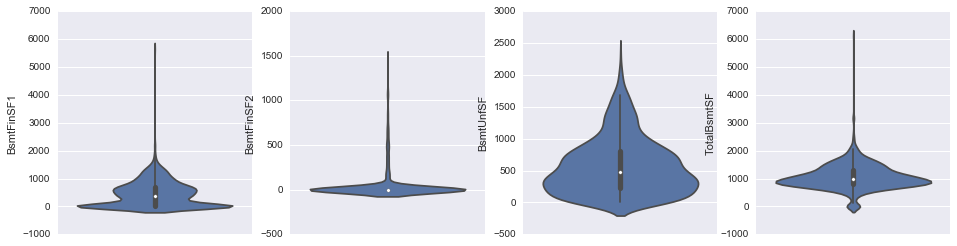

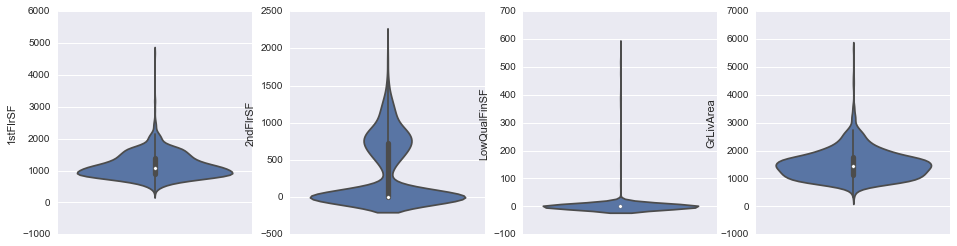

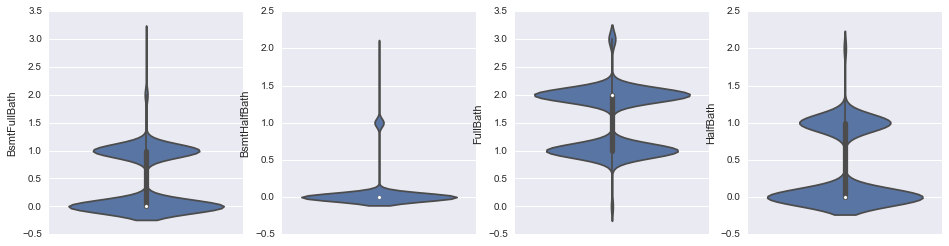

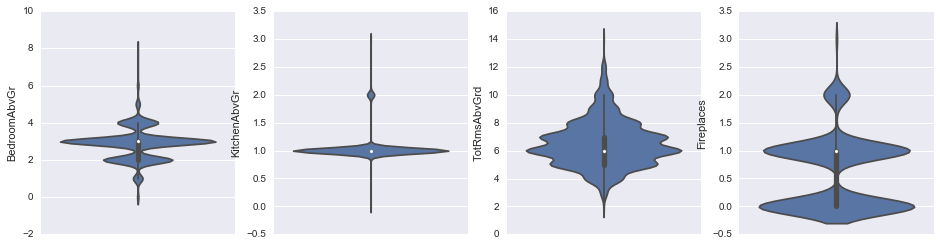

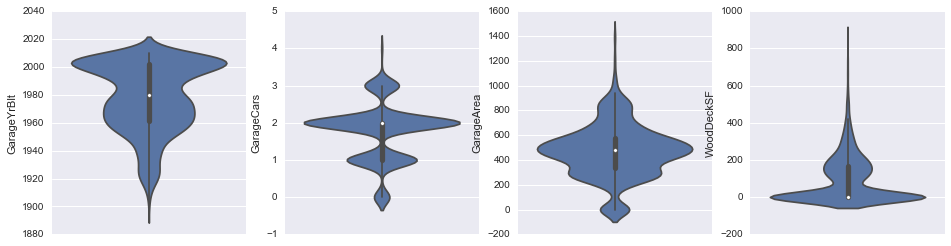

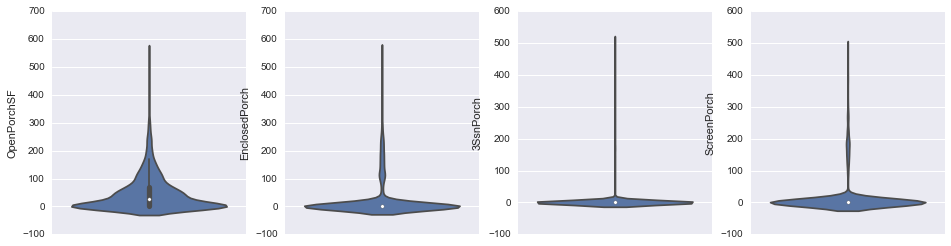

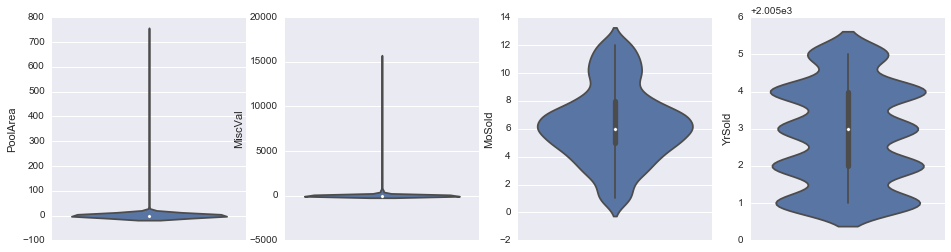

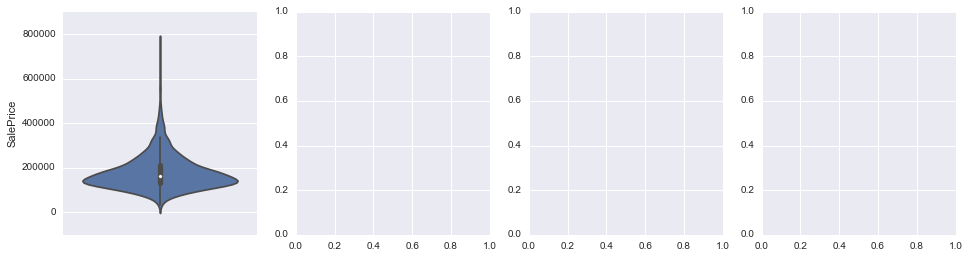

In [43]:
numeric_cols = []

for col, col_data in train.iteritems():
    if col_data.dtype != object and col!='Id':
        numeric_cols.append(col)
        
n_cols = 4
n_rows = 10
idx = 0
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols = n_cols, figsize=(16,4))
    for j in range(n_cols):
        sns.violinplot(y=train[numeric_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 37:
            break

**Highly skewed features: **
    - LotArea
    - BasmtFinSF2
    - LowQualFinSF
    - BsmtHalfBath
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal

# Visualize Categorical features

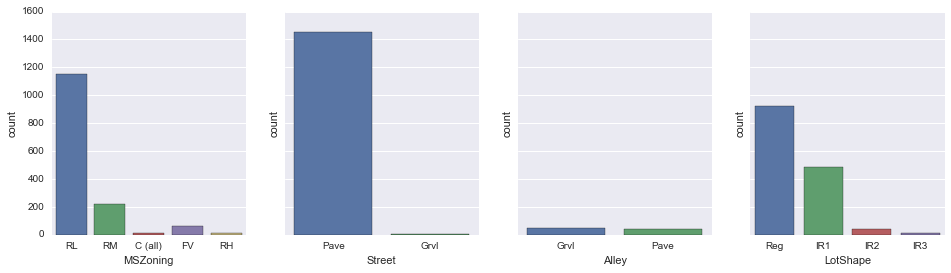

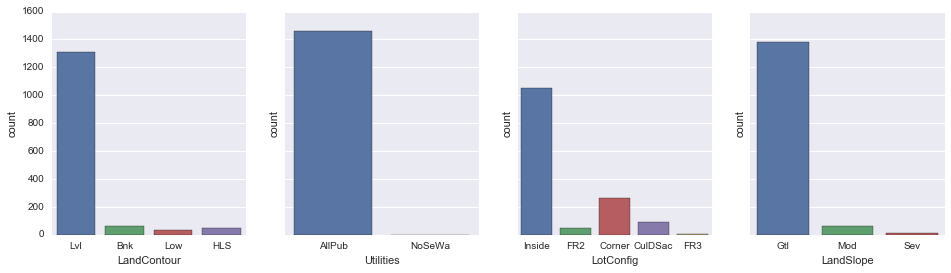

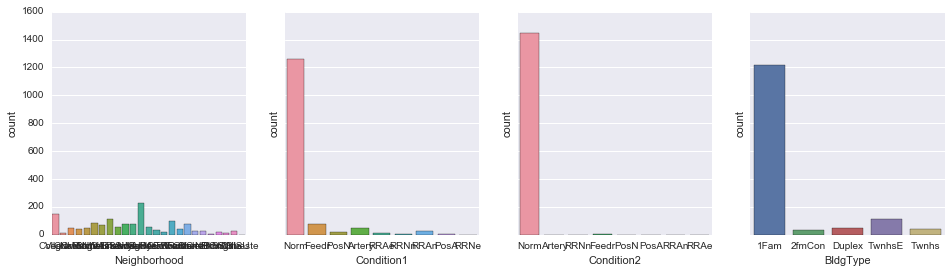

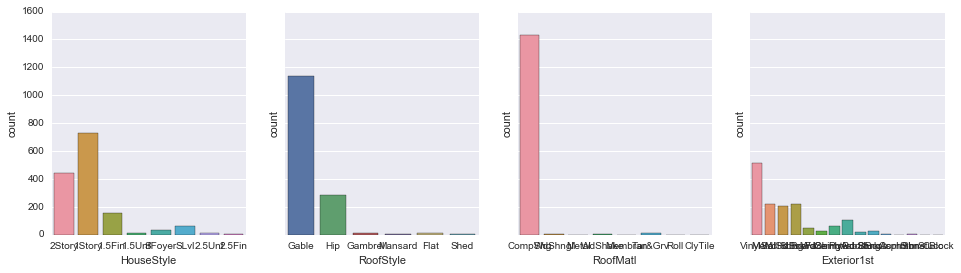

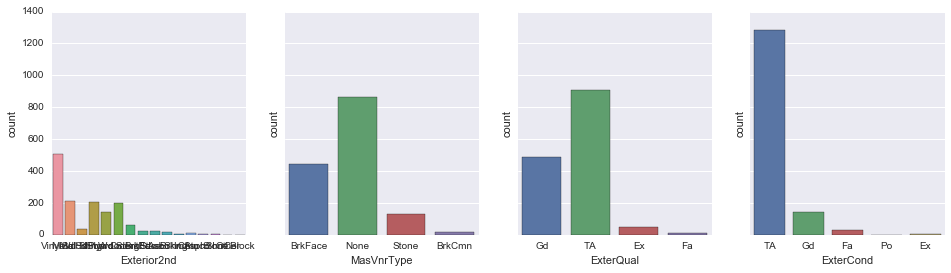

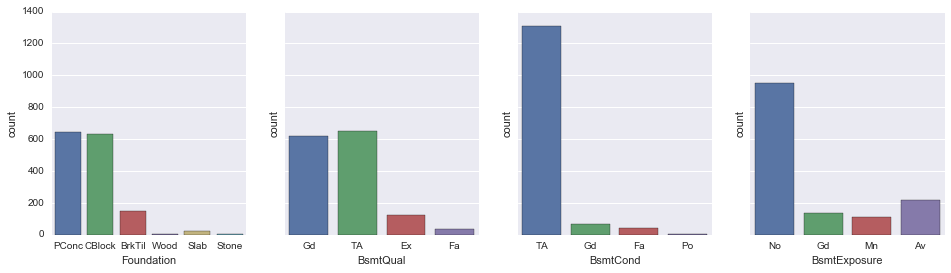

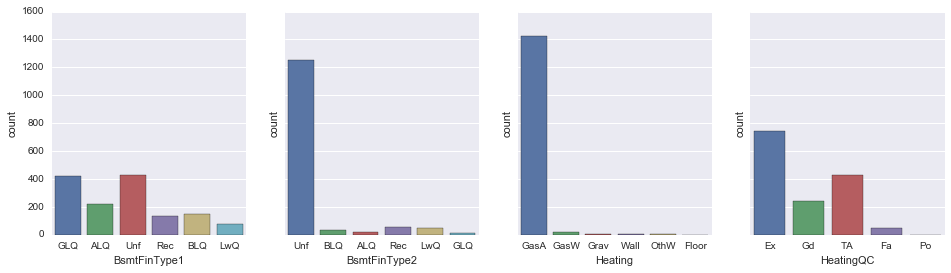

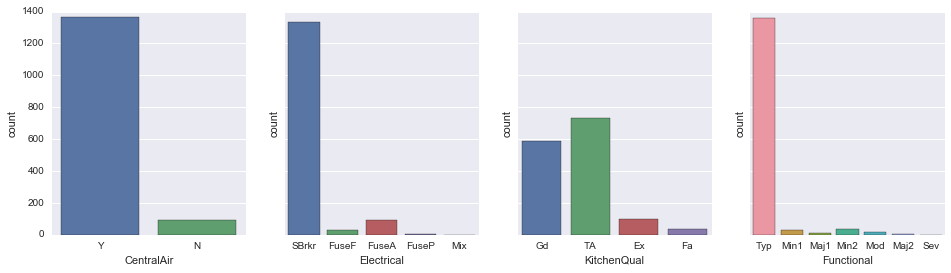

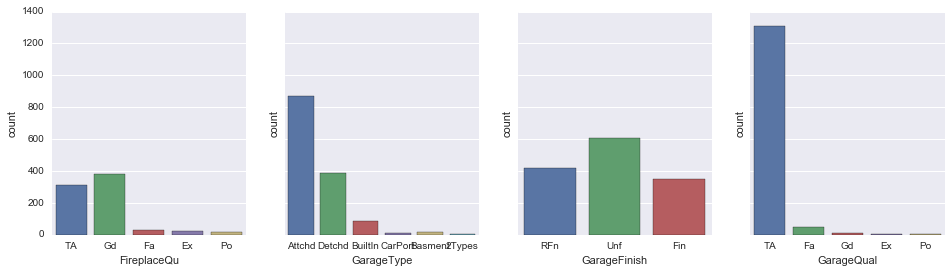

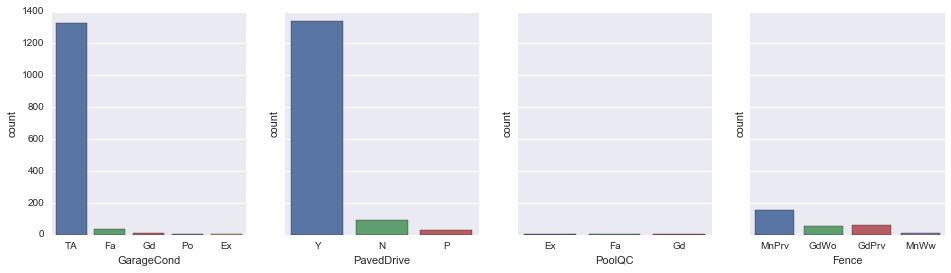

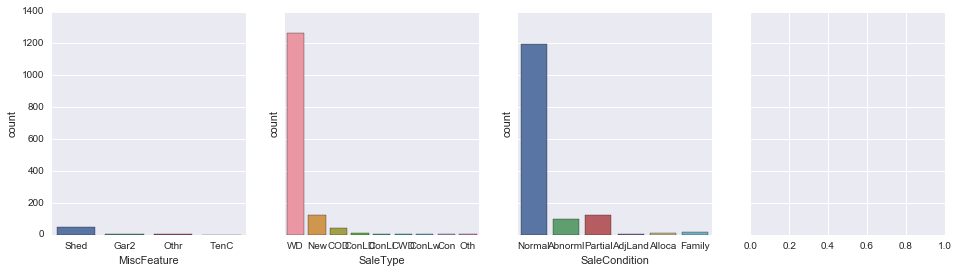

In [44]:
categorical_cols = []
for col, col_data in train.iteritems():
    if col_data.dtype == object:
        categorical_cols.append(col)

n_cols = 4
n_rows = 11
idx = 0
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(16, 4))
    for j in range(n_cols):
        sns.countplot(x=train[categorical_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 43:
            break

**Abnormal categorical features:**
- Street
- Alley
- Utilities
- PoolQC
- MiscFeature

In [10]:
train.groupby('Street').agg({'SalePrice':[np.mean, np.size]})

SalePrice      
            mean  size
Street                
Grvl      130190     6
Pave      181130  1454

In [11]:
train.groupby('Alley').agg({'SalePrice':[np.mean, np.size]})

SalePrice     
           mean size
Alley               
Grvl     122219   50
Pave     168000   41

In [12]:
train.groupby('Utilities').agg({'SalePrice':[np.mean, np.size]})

SalePrice      
               mean  size
Utilities                
AllPub       180950  1459
NoSeWa       137500     1

### Except

In [13]:
train.groupby('PoolQC').agg({'SalePrice':[np.mean, np.size]})

SalePrice     
            mean size
PoolQC               
Ex        490000    2
Fa        215500    2
Gd        201990    3

In [95]:
train.groupby('MiscFeature').agg({'SalePrice':{'Size': np.size,'Mean': np.mean}})

SalePrice     
                 Mean Size
MiscFeature               
Gar2           170750    2
Othr            94000    2
Shed           151187   49
TenC           250000    1

## Scatter plot of dependent and independent continuous variables

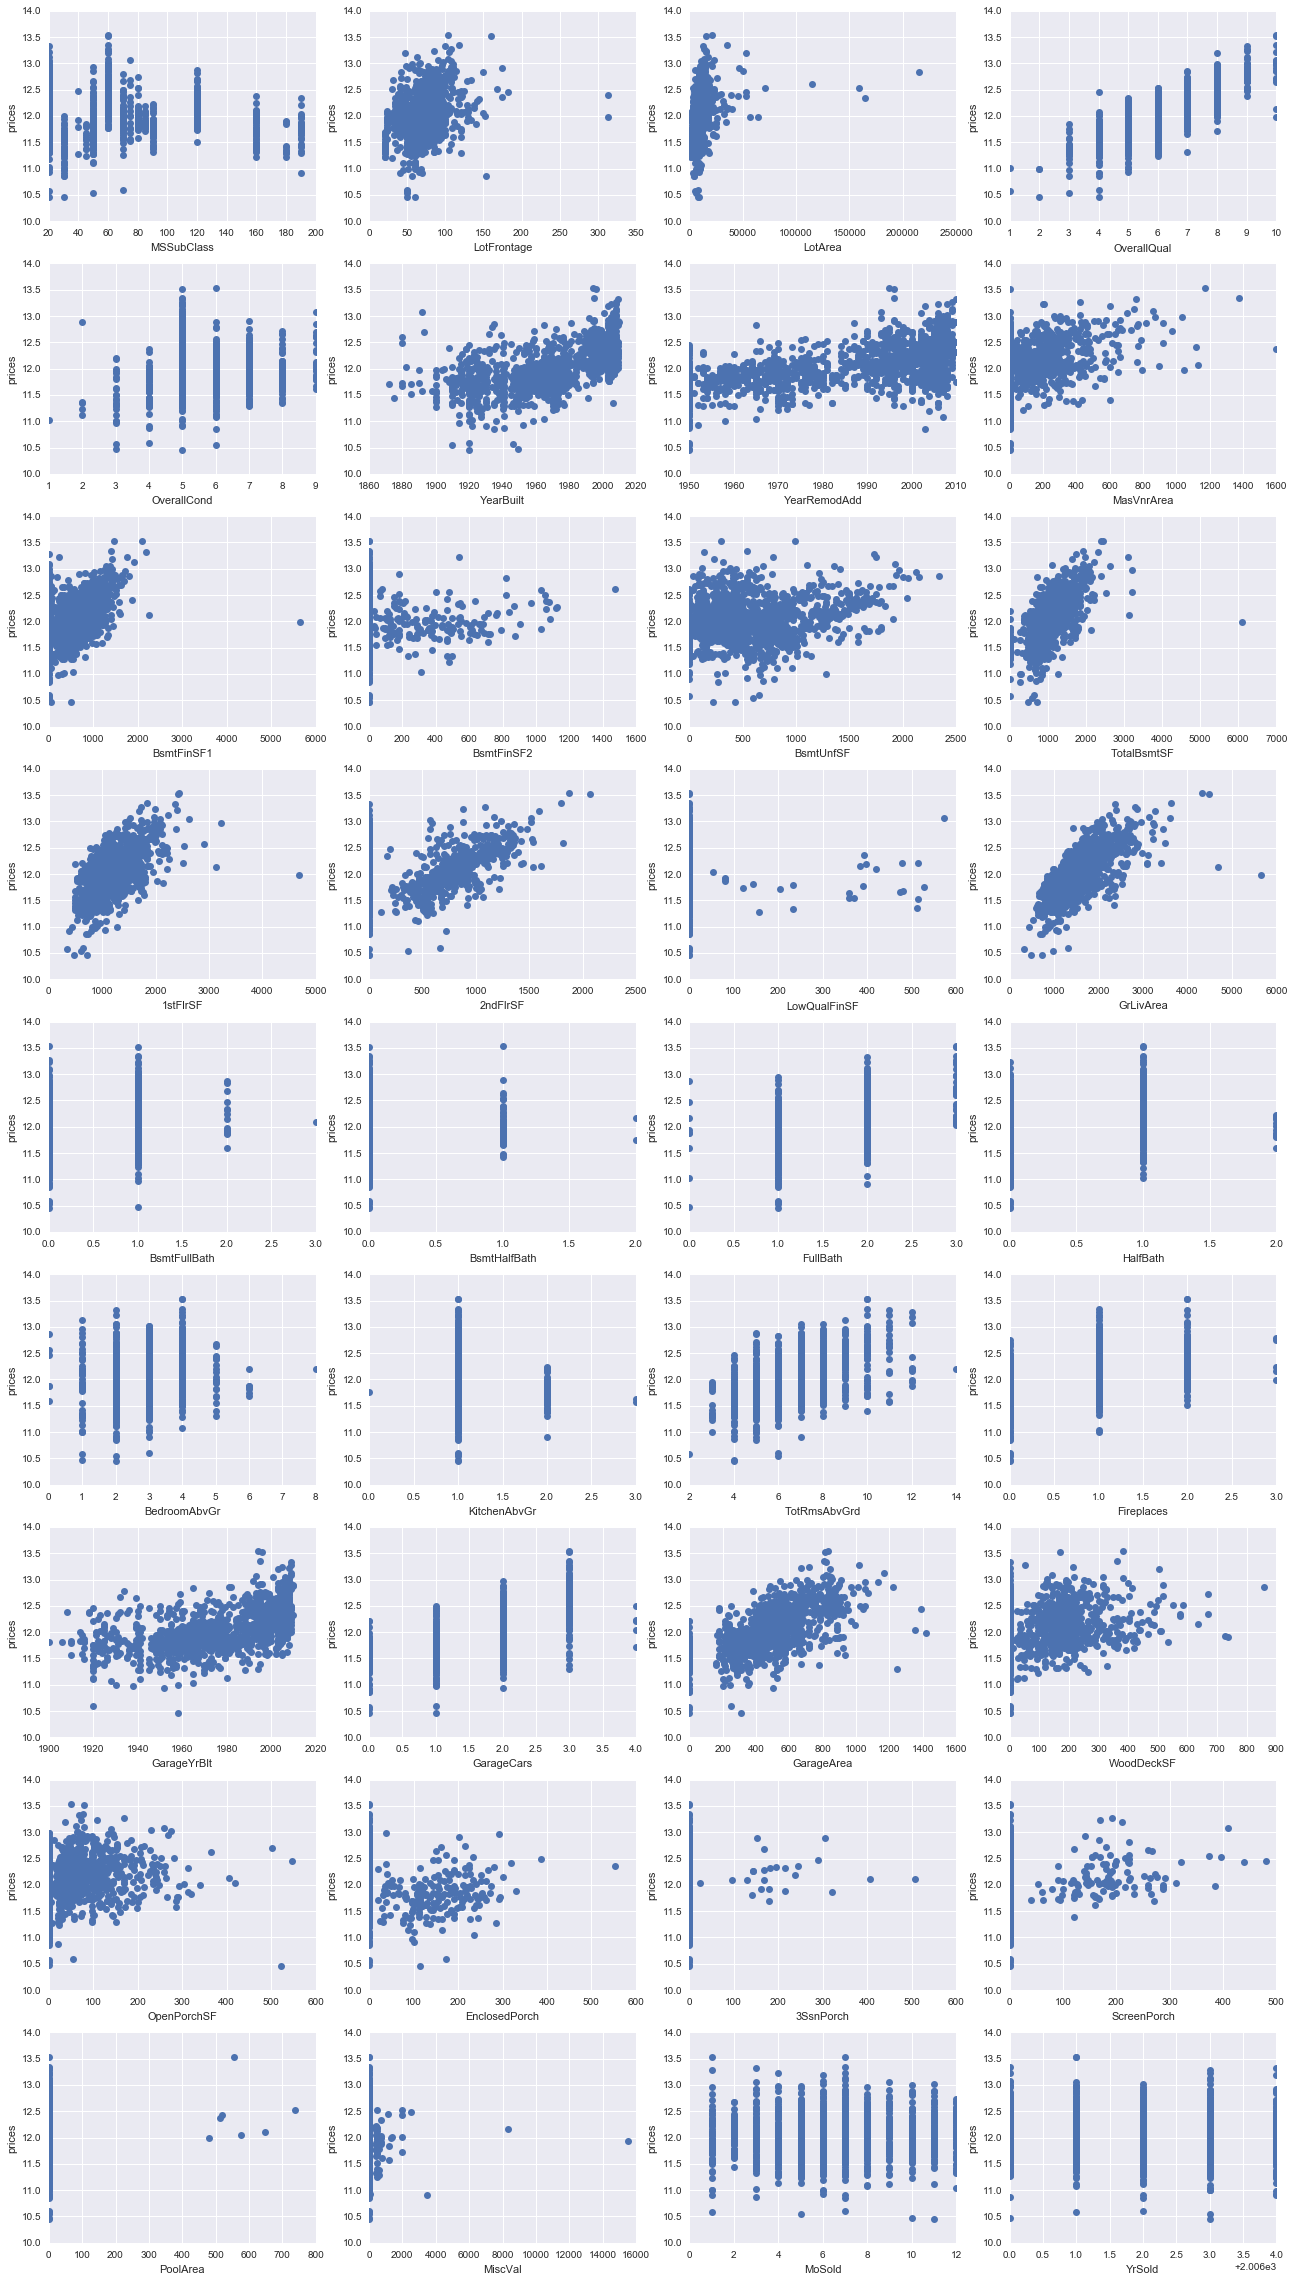

In [35]:
fig = plt.figure(figsize=(22, 40))

for i, col in enumerate(numeric_cols):
    if col != 'SalePrice':
        plt.subplot(9, 4, i + 1)  

        plt.plot(train[col], np.log((train.SalePrice)), 'o')
        plt.xlabel(col)
        plt.ylabel('prices')

## Check the feature correlation more than 0.8 or less than -0.8

In [86]:
train_corr = train.iloc[:,1:-1].corr()
train_corr.shape[0]
for i in range(train_corr.shape[0]-1, 0, -1):
    for j in range(0, train_corr.shape[0]):
        if i < j and (train_corr.iloc[i,j] >= 0.8  or train_corr.iloc[i,j] <= -0.8):
            print "The correlation between {} and {} is {}".format(train.columns[i], \
                                train.columns[j], round(train_corr.iloc[i,j],2))        

The correlation between MasVnrType and MasVnrArea is 0.88
The correlation between BldgType and RoofMatl is 0.83
The correlation between LandSlope and Neighborhood is 0.82
The correlation between Street and Exterior2nd is 0.83


## Convert Categorical variables to dummy variables - One Hot Encoding

In [92]:
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [150]:
# check the missing values in each feature
s = test.apply(lambda x: sum(x.isnull()), axis=0)
s[s>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

dummy_train = []
dummy_test = []
labels = []
for idx, col in enumerate(categorical_cols):
    
    #labels = list(set(train[col].unique()) | set(test[col].unique()))
    
    # label encode
    print col
    label_encoder = LabelEncoder()
    label_encoder.fit(train[col])
    feature_train = label_encoder.transform(train[col])
    feature_train = feature_train.reshape(train.shape[0],1)
    
    feature_test = label_encoder.transform(test[col])
    feature_test = feature_test.reshape(test.shape[0],1)
    # one hot encode
    onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels))
    feature_train = onehot_encoder.fit_transform(feature_train)
    dummy_train.append(feature_train)
    
    feature_test = onehot_encoder.fit_transform(feature_test)
    dummy_test.append(feature_test)
    
# Make a 2D array from a list of 1D arrays
encode_train = np.column_stack(dummy_train)
encode_test = np.column_stack(dummy_test)

print(encode_train.shape)
print(encode_test.shape)

MSZoning


ValueError: y contains new labels: [nan]

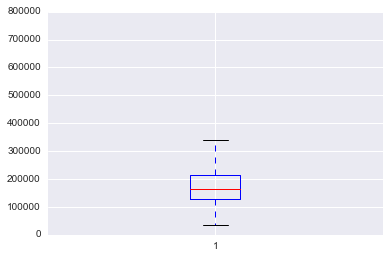

In [66]:
# check sold price

plt.boxplot(train.SalePrice)
plt.show()

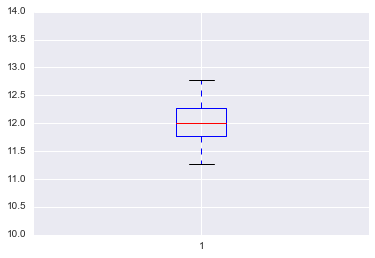

In [90]:
plt.boxplot(np.log(train.SalePrice),whis=True)
plt.show()

In [89]:
plt.boxplot?

(array([  22.,  126.,  380.,  343.,  229.,  144.,   86.,   49.,   28.,
          23.,   12.,    7.,    3.,    1.,    2.,    1.,    2.,    0.,
           0.,    2.]),
 array([  34900.,   70905.,  106910.,  142915.,  178920.,  214925.,
         250930.,  286935.,  322940.,  358945.,  394950.,  430955.,
         466960.,  502965.,  538970.,  574975.,  610980.,  646985.,
         682990.,  718995.,  755000.]),
 <a list of 20 Patch objects>)

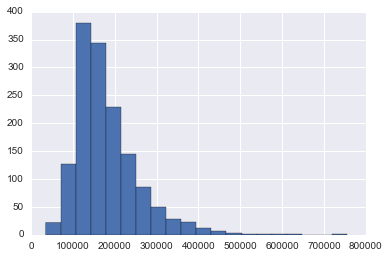

In [31]:
plt.hist(train.SalePrice, bins=20)

In [49]:
from collections import Counter

for col, col_data in train.iteritems():
    if col_data.dtype == object:
        cnt = Counter(col_data)
        print col + ':' , cnt
print '\n' 
print 'Numerical variables with missing values:'
for col, col_data in train.iteritems():
    if col_data.dtype != object and any(col_data.isnull()):

        print col + ':' , any(col_data.isnull())

MSZoning: Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
Street: Counter({'Pave': 1454, 'Grvl': 6})
Alley: Counter({nan: 1369, 'Grvl': 50, 'Pave': 41})
LotShape: Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour: Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
Utilities: Counter({'AllPub': 1459, 'NoSeWa': 1})
LotConfig: Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
LandSlope: Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Neighborhood: Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'SWISU': 25, 'StoneBr': 25, 'Blmngtn': 17, 'MeadowV': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
Condition1: Counter({'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 

In [50]:
train.PoolArea

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, dtype: int64